In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('iter.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGCCGACCTCGGAATGCGGTCTCCATGCGGTTT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAAGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCACCTTCAAGAGG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTATCATCCGTCGCTGAGCGCATTTTGT...
...,...,...
4995,ACTACATTTGCCAACTGCCGGCTTGATTGAACAAGAGGCTTGAGCG...,ACTACATTTGCCAACTGCCGGCTTGATTGAACAAGAGGCTTGAGCG...
4996,CGGCGCCCGTGTTTTAGATTATTATACGTTCTTGTACGATCAATAT...,CGGCGCCCGTGTTTTAGATTATTATACGTTCTTGTACGATCAATAT...
4997,CGTAACGCTTATACATCGTAGGAAAGGACCCCTACATTGGATCTAG...,CGTAACGCTTATACATCGTAGGAAAGGACCCCTACATTGGATCTAG...
4998,GGTAAGTGGGCCTGTACATTCACTCTACGGCCCTGAGACGCCTAAT...,GGTAAGTGGGCCTGTACATTCACTCTACGGCCCTGAGACGCCTAAT...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [9]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 5000/5000 [00:00<00:00, 64303.58it/s]


[19, 53, 117, 193, 231, 288, 354, 378, 444, 499, 549, 584, 653, 711, 710, 767, 801, 821, 906, 896, 955, 993, 1003, 1084, 1035, 1093, 1123, 1169, 1164, 1205, 1258, 1296, 1302, 1350, 1371, 1416, 1425, 1466, 1462, 1497, 1508, 1520, 1549, 1567, 1581, 1608, 1629, 1607, 1647, 1691, 1676, 1705, 1694, 1690, 1726, 1765, 1723, 1750, 1756, 1791, 1783, 1782, 1767, 1823, 1797, 1816, 1797, 1854, 1830, 1859, 1868, 1875, 1877, 1889, 1932, 1904, 1887, 1942, 1955, 1953, 1926, 1949, 1953, 1953, 1950, 1959, 1926, 1993, 1972, 2002, 1953, 1957, 1947, 1992, 1912, 1936, 1931, 1947, 1889, 1960, 1924, 1979, 2022, 1960, 1947, 1983, 2014, 1959, 1957, 1965, 0]


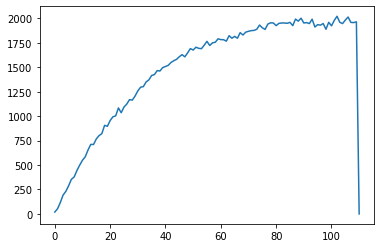

In [10]:
strand_len = 200
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [11]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 5000/5000 [00:06<00:00, 751.90it/s]


In [12]:
import numpy as np


In [13]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [14]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

 -> GA 6
AA ->  6
 -> TG 7
 -> GT 7
 -> CG 7
TA ->  8
CT ->  9
GA ->  9
CA ->  10
 -> GC 10
 -> TA 10
GT ->  11
TG ->  12
AT ->  12
TC ->  13
AC ->  13
AG ->  15
CG ->  16
G -> A 31
G -> C 47
G -> T 48
T -> A 49
C -> G 54
A -> T 55
A -> C 60
C -> A 60
T -> C 62
A -> G 64
T -> G 67
C -> T 84
G ->  484
A ->  531
T ->  607
C ->  610
 -> A 613
 -> T 652
 -> C 683
 -> G 715


In [15]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [16]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


G ->  @ 17 6
 -> C @ 82 6
 -> T @ 105 6
T ->  @ 101 6
 -> C @ 8 6
 -> C @ 93 6
 -> T @ 109 6
 -> C @ 85 6
 -> T @ 106 6
T ->  @ 105 6
 -> C @ 87 6
T ->  @ 106 6
 -> C @ 88 6
 -> C @ 89 6
 -> T @ 15 6
 -> C @ 74 6
A ->  @ 19 6
 -> A @ 32 6
T ->  @ 61 6
 -> T @ 68 6
T ->  @ 74 6
 -> C @ 40 6
 -> T @ 50 6
 -> T @ 73 6
G ->  @ 10 6
 -> A @ 11 6
T ->  @ 8 6
 -> T @ 47 6
 -> A @ 14 6
 -> A @ 17 6
 -> T @ 4 6
G ->  @ 16 6
T ->  @ 9 6
T ->  @ 93 6
 -> A @ 2 6
T ->  @ 50 6
 -> T @ 99 6
T ->  @ 46 6
T ->  @ 44 6
 -> G @ 97 6
 -> A @ 26 6
 -> C @ 58 6
T ->  @ 4 6
 -> C @ 60 6
 -> C @ 69 6
T ->  @ 30 6
T ->  @ 90 6
C ->  @ 88 6
T ->  @ 63 6
 -> G @ 93 6
C ->  @ 21 6
G ->  @ 85 6
 -> G @ 22 6
C ->  @ 27 6
C ->  @ 29 6
C ->  @ 33 6
 -> G @ 32 6
 -> G @ 19 6
A ->  @ 77 6
C ->  @ 4 6
C ->  @ 85 6
 -> G @ 41 6
 -> A @ 94 6
 -> G @ 43 6
 -> G @ 49 6
A ->  @ 84 6
 -> A @ 97 6
 -> G @ 18 6
G ->  @ 80 6
G ->  @ 49 6
A ->  @ 22 6
A ->  @ 14 6
G ->  @ 64 6
G ->  @ 6 6
A ->  @ 31 6
A ->  @ 38 6
A ->  @ 39 6
A

In [17]:
import matplotlib.pyplot as plt

In [18]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[1401, 78, 75, 82, 73, 81, 102, 83, 67, 64, 80, 79, 89, 73, 67, 61, 87, 72, 84, 77, 72, 76, 67, 81, 66, 56, 56, 71, 48, 55, 53, 57, 61, 50, 69, 64, 50, 51, 61, 58, 45, 51, 49, 44, 47, 43, 38, 53, 40, 47, 52, 49, 46, 53, 36, 58, 42, 55, 56, 49, 59, 50, 56, 63, 69, 68, 57, 51, 70, 56, 73, 60, 76, 84, 62, 64, 81, 83, 65, 67, 74, 78, 69, 72, 71, 70, 74, 75, 73, 55, 46, 50, 58, 42, 41, 55, 48, 51, 45, 58, 54, 58, 43, 55, 55, 66, 71, 68, 51, 76, 4997]


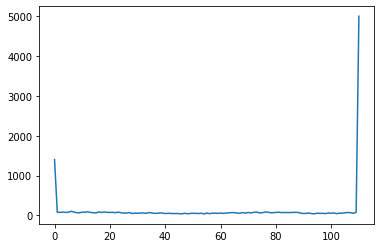

In [19]:
plt.plot(range(strand_len + 1), pos_counts)

In [20]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[1, 5, 4, 4, 6, 3, 5, 10, 8, 4, 4, 4, 7, 9, 5, 6, 7, 4, 10, 4, 5, 7, 7, 5, 8, 2, 5, 12, 5, 5, 4, 9, 1, 1, 9, 10, 8, 4, 9, 9, 7, 7, 2, 9, 3, 3, 4, 6, 5, 2, 6, 3, 4, 5, 1, 5, 4, 8, 5, 7, 9, 6, 7, 9, 5, 13, 10, 5, 6, 1, 7, 5, 10, 6, 5, 10, 7, 7, 7, 5, 11, 9, 7, 2, 5, 9, 8, 3, 5, 3, 4, 5, 7, 5, 7, 4, 2, 5, 8, 6, 8, 5, 7, 4, 9, 6, 6, 7, 8, 6, 0]


In [21]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


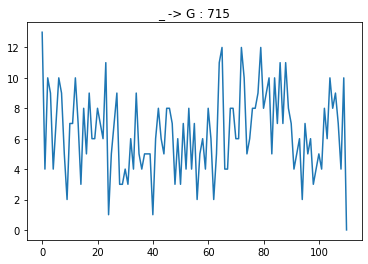

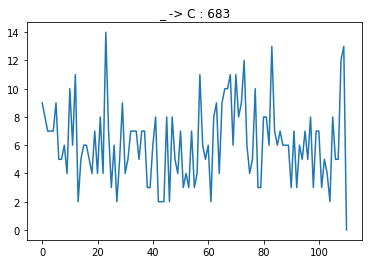

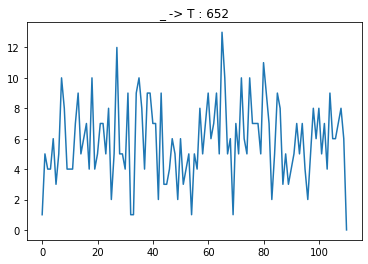

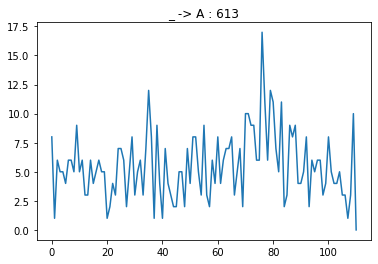

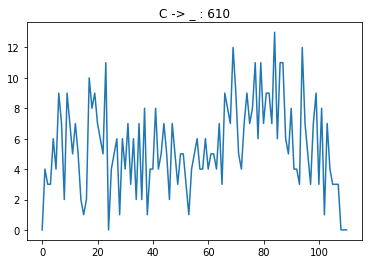

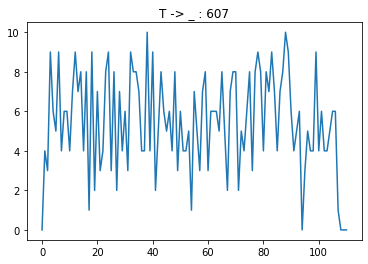

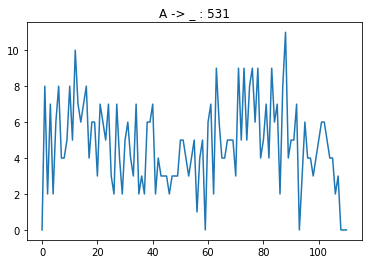

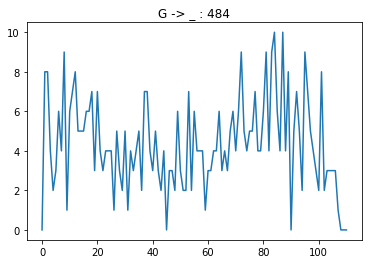

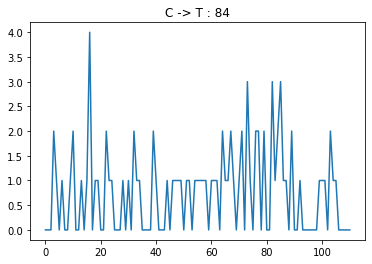

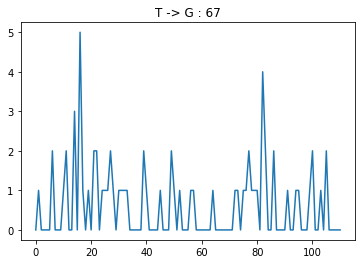

In [22]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [23]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)